<a href="https://colab.research.google.com/github/daniyar-udel/PUS2024_DAbykhanov/blob/main/Math_Tech_DS_hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('JSE_Car_Lab.csv', sep = ',')

In [ ]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
y = data['Price']
x = data[['Mileage']]

from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(x, y)

print(lin_model.coef_)
print(lin_model.intercept_)

[-0.1725205]
24764.55900606168


In [ ]:
residuals = y - lin_model.predict(x)
RMSE = np.sqrt((residuals ** 2).mean())
print(RMSE)

9777.104975344371


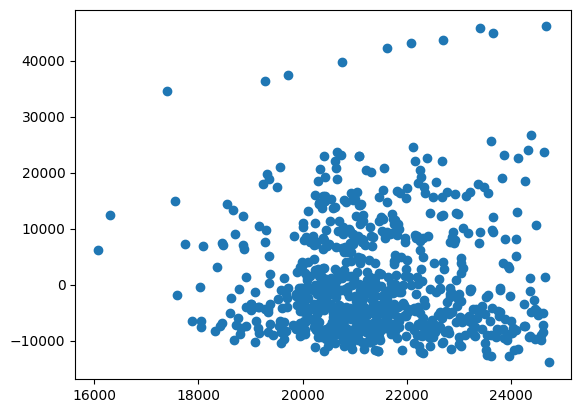

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(lin_model.predict(x), residuals)

In [ ]:
idx = np.where(residuals > 30000)
data.iloc[idx]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
150,70755.466717,583,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
151,68566.187189,6420,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
152,69133.731722,7892,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
153,66374.307040,12021,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
154,65281.481237,15600,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
155,63913.117248,18200,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
156,60567.549093,23193,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
157,57154.443437,29260,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
158,55639.087654,31805,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,0,1
159,52001.994379,42691,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1


# Lab work  number 1 (Further ideas to explore)


## Let's delete outliers and see what is going to be

In [ ]:
data = data.drop(data.iloc[idx].index)

In [ ]:
y = data['Price'] # Let's take out target, we will predict the Price
x = data[['Mileage']] # Mileage will be our first input

lin_model_1 = LinearRegression(fit_intercept = True) # Create LinearRegression
lin_model_1.fit(x, y) # Model training

print(lin_model_1.coef_) # Let's see the weight
print(lin_model_1.intercept_) # Let's see the intercept

[-0.15494387]
23894.185488928622


In [ ]:
np.sqrt(((y-lin_model_1.predict(x)) ** 2).mean()) # Root Mean Square Error

8643.664297888203

### We deleted outliers and we can see that RMSE was reduced, let's try other techiques to reduce RMSE


## Let's add more Discrete and Continius variables


In [ ]:
data.head() # The first 5 rows in data

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
data.info() # This is very helpfull function, because we can see Non Nul Count and Dtype

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     794 non-null    float64
 1   Mileage   794 non-null    int64  
 2   Make      794 non-null    object 
 3   Model     794 non-null    object 
 4   Trim      794 non-null    object 
 5   Type      794 non-null    object 
 6   Cylinder  794 non-null    int64  
 7   Liter     794 non-null    float64
 8   Doors     794 non-null    int64  
 9   Cruise    794 non-null    int64  
 10  Sound     794 non-null    int64  
 11  Leather   794 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 80.6+ KB


In [ ]:
y = data['Price'] # We still use the same
x = data[['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']] # We add more variables

lin_model_2 = LinearRegression(fit_intercept=True) # Create LinearRegression
lin_model_2.fit(x, y) # Training the model

print(lin_model_2.coef_) # Let's see the weight
print(lin_model_2.intercept_) #Let's see the intercept

[  901.28917179  2288.72046042  -337.13257925  6004.48348751
 -2519.36672981  2993.82149389]
5438.412984365243


In [ ]:
np.sqrt(((y-lin_model_2.predict(x)) ** 2).mean()) # Root Mean Square Error

6657.004693324455

### We added more variable and we can see that RMSE was reduced, let's try other techiques to reduce RMSE.


## Let's add some predictor transofrmations to the model, like Xp+1 = mileage ** 2

In [ ]:
data.head() # See the first 5 row

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
data['Mileage_2'] = data.Mileage ** 2  # Let's scale Mileage
data['Cylinder_2'] = data.Cylinder ** 3 #Let's scale Cylinder
data['Liter_2'] = data.Liter ** 4 #Let's scale Liter
data['Doors_2'] = data.Doors ** 2 #Let's scale Doors

In [ ]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage_2,Cylinder_2,Liter_2,Doors_2
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,67584841,216,92.3521,16
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,83448225,216,92.3521,16
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,174134416,216,92.3521,16
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,267060964,216,92.3521,16
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,393308224,216,92.3521,16


In [ ]:
y = data.Price # Out target
x = data[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise',
          'Sound', 'Leather', 'Mileage_2', 'Cylinder_2', 'Liter_2', 'Doors_2']] #our Variables

lin_model_3 = LinearRegression(fit_intercept = True) # LinearRegression
lin_model_3.fit(x, y) # Let's train our data

print(lin_model_3.coef_) # Weights of the model
print(lin_model_3.intercept_) # Intercept of the model

[-2.16415770e-01 -1.00274840e+04  3.29239652e+03  1.06493882e+01
  6.53104574e+03 -1.48839506e+03  1.07978320e+03  1.36069139e-06
  1.02124770e+02 -8.43698292e-01  6.38963291e+01]
43844.725455322434


In [ ]:
np.sqrt(((y-lin_model_3.predict(x)) ** 2).mean()) # Root Mean Square Error

5843.519683251649

### We added more variable and we can see that RMSE was reduced, let's try other techiques to reduce RMSE.

## Let's divide our dataset on cheapest cars and expensive cars

In [ ]:
data.head() # Let's see our first 5 row

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage_2,Cylinder_2,Liter_2,Doors_2
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,67584841,216,92.3521,16
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,83448225,216,92.3521,16
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,174134416,216,92.3521,16
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,267060964,216,92.3521,16
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,393308224,216,92.3521,16


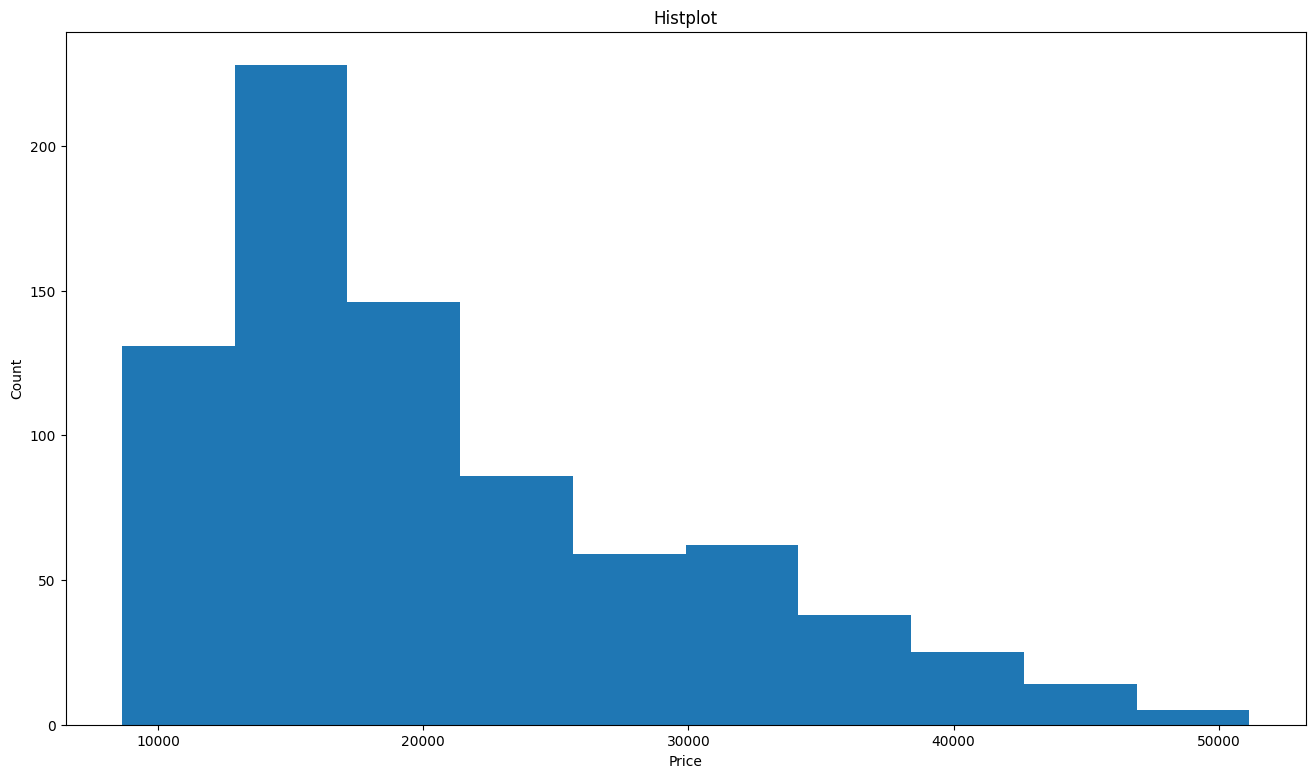

In [ ]:
fig = plt.figure() # Create a figure
fig.set_size_inches(16, 9) # Set size of the figure
plt.title('Histplot') # Name of the figure
plt.xlabel('Price') # Name of xlabel
plt.ylabel('Count') # Name of y label
plt.hist(data.Price) #Histogram
plt.show() #Show th plot

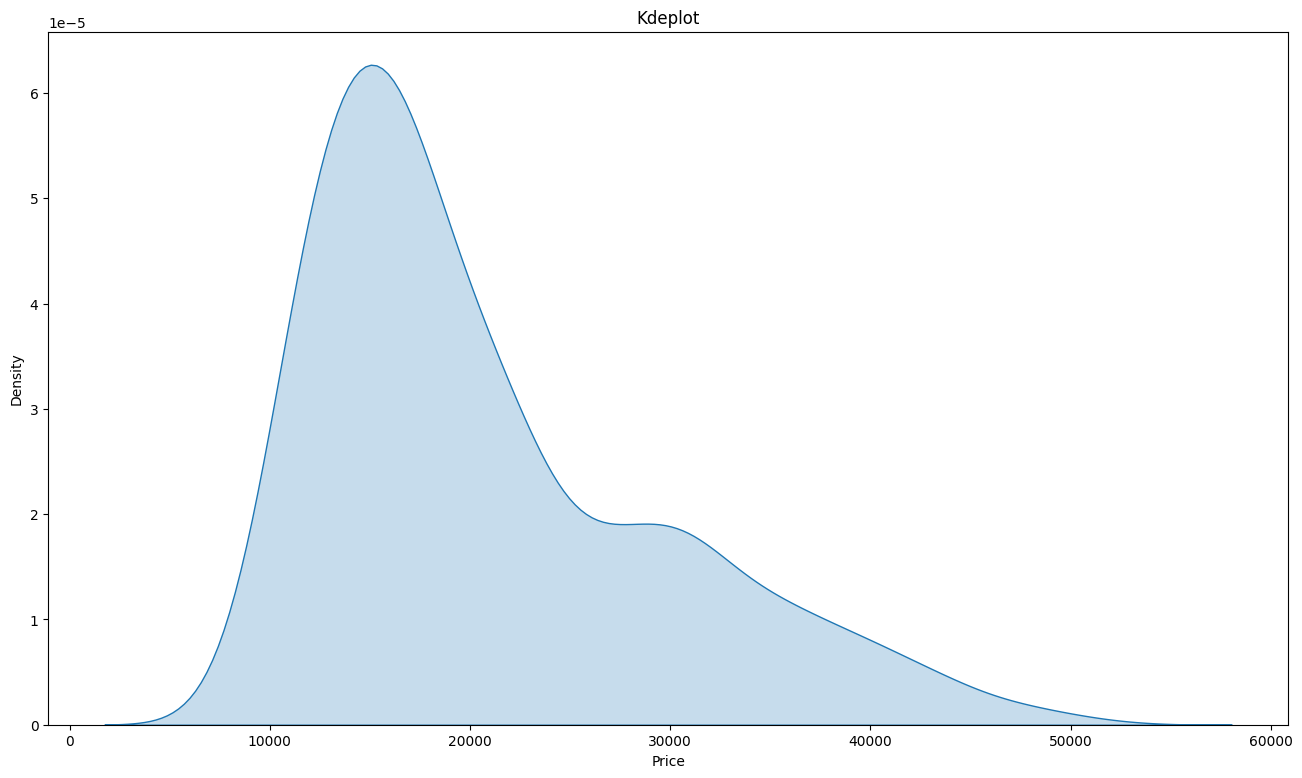

In [ ]:
import seaborn as sns

fig = plt.figure() # Create a figure
fig.set_size_inches(16, 9) # Set size of the figure
plt.title('Kdeplot') # Title of plot
sns.kdeplot(data.Price, fill = True) # Create kdeplot
plt.show() # Show the figure

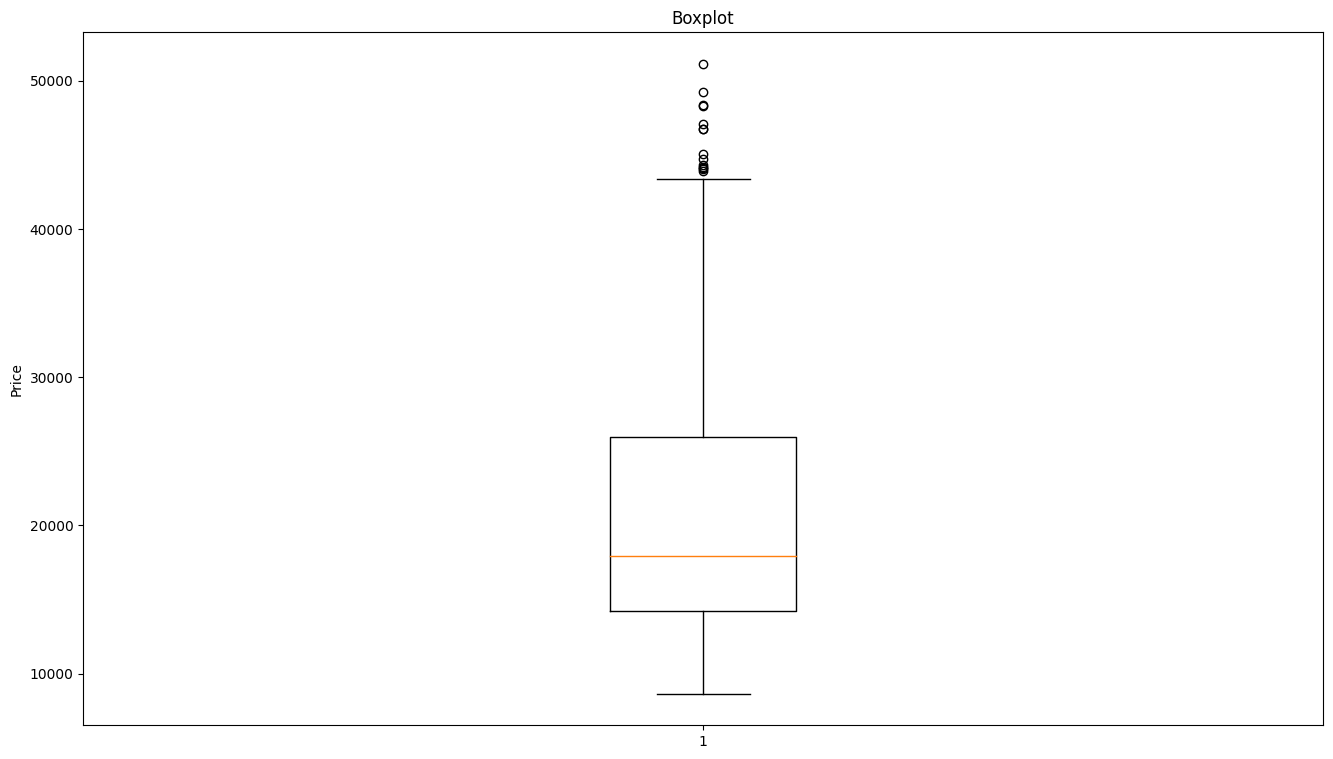

In [ ]:
fig = plt.figure() # Create a figure
fig.set_size_inches(16, 9) #Set the size of the figure
plt.title('Boxplot') # Name of the figure
plt.ylabel('Price') # Name of y label
plt.boxplot(data.Price) #Create boxplot
plt.show() # Show the figure

### After the graphics review, we can separate out dataset on cheap cars < 25000 and expensive_cars > 25000


In [ ]:
data_cheap_cars = data[data['Price'] < 25000] # Let's take only cheap cars

In [ ]:
data_cheap_cars.head() # Let's see the first 5 row

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage_2,Cylinder_2,Liter_2,Doors_2
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,67584841,216,92.3521,16
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,83448225,216,92.3521,16
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,174134416,216,92.3521,16
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,267060964,216,92.3521,16
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,393308224,216,92.3521,16


In [ ]:
data_cheap_cars.shape # Shape of the table

(581, 16)

In [ ]:
y = data_cheap_cars.Price # Out target
x = data_cheap_cars[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise',
          'Sound', 'Leather', 'Mileage_2', 'Cylinder_2', 'Liter_2', 'Doors_2']] #our Variables

lin_model_4 = LinearRegression(fit_intercept = True) # LinearRegression
lin_model_4.fit(x, y) # Let's train our data

print(lin_model_4.coef_) # Weights of the model
print(lin_model_4.intercept_) # Intercept of the model

[-1.60144042e-01 -2.10995276e+03  4.47615821e+03  1.46177648e+01
  1.07300463e+03 -5.40120568e+02 -1.51306843e+02  2.16513172e-06
  7.25906830e+00  3.86510110e+00  8.77065890e+01]
13462.664639156246


In [ ]:
np.sqrt(((y-lin_model_4.predict(x)) ** 2).mean()) # Root Mean Square Error

2283.804274816326

In [ ]:
data_expensive_cars = data[data['Price'] >= 25000] # Let's take expensive cars

In [ ]:
data_expensive_cars.head() # Let's see first 5 row

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage_2,Cylinder_2,Liter_2,Doors_2
60,25589.983155,2308,Buick,Park Avenue,Sedan 4D,Sedan,6,3.8,4,1,1,0,5326864,216,208.5136,16
61,25098.629057,10014,Buick,Park Avenue,Sedan 4D,Sedan,6,3.8,4,1,1,0,100280196,216,208.5136,16
70,26831.194037,4695,Buick,Park Avenue,Special Ed Ultra 4D,Sedan,6,3.8,4,1,1,0,22043025,216,208.5136,16
71,26060.335350,9795,Buick,Park Avenue,Special Ed Ultra 4D,Sedan,6,3.8,4,1,1,0,95942025,216,208.5136,16
72,26781.814645,12052,Buick,Park Avenue,Special Ed Ultra 4D,Sedan,6,3.8,4,1,1,0,145250704,216,208.5136,16


In [ ]:
data_expensive_cars.shape # Shape of the table

(213, 16)

In [ ]:
y = data_expensive_cars.Price # Out target
x = data_expensive_cars[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise',
          'Sound', 'Leather', 'Mileage_2', 'Cylinder_2', 'Liter_2', 'Doors_2']] #our Variables

lin_model_5 = LinearRegression(fit_intercept = True) # LinearRegression
lin_model_5.fit(x, y) # Let's train our data

print(lin_model_5.coef_) # Weights of the model
print(lin_model_5.intercept_) # Intercept of the model

[-3.16752594e-01 -7.96984912e+02 -3.16682144e+03 -1.37278107e+01
 -1.81898940e-12 -4.42420048e+02  2.59124243e+03  2.61755270e-06
  3.42967087e+01  5.43768812e+00 -8.23668645e+01]
42369.75797585698


In [ ]:
np.sqrt(((y-lin_model_5.predict(x)) ** 2).mean()) # Root Mean Square Error

4147.589995342296

### We added more variable and we can see that RMSE was reduced, let's try other techiques to reduce RMSE.

## Let's add nun-numerical variables to the model

In [ ]:
data_cheap_cars.head() # Frist 5 row

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage_2,Cylinder_2,Liter_2,Doors_2
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,67584841,216,92.3521,16
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,83448225,216,92.3521,16
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,174134416,216,92.3521,16
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,267060964,216,92.3521,16
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,393308224,216,92.3521,16


In [ ]:
data_cheap_cars.info() #Info

<class 'pandas.core.frame.DataFrame'>
Index: 581 entries, 0 to 803
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       581 non-null    float64
 1   Mileage     581 non-null    int64  
 2   Make        581 non-null    object 
 3   Model       581 non-null    object 
 4   Trim        581 non-null    object 
 5   Type        581 non-null    object 
 6   Cylinder    581 non-null    int64  
 7   Liter       581 non-null    float64
 8   Doors       581 non-null    int64  
 9   Cruise      581 non-null    int64  
 10  Sound       581 non-null    int64  
 11  Leather     581 non-null    int64  
 12  Mileage_2   581 non-null    int64  
 13  Cylinder_2  581 non-null    int64  
 14  Liter_2     581 non-null    float64
 15  Doors_2     581 non-null    int64  
dtypes: float64(3), int64(9), object(4)
memory usage: 77.2+ KB


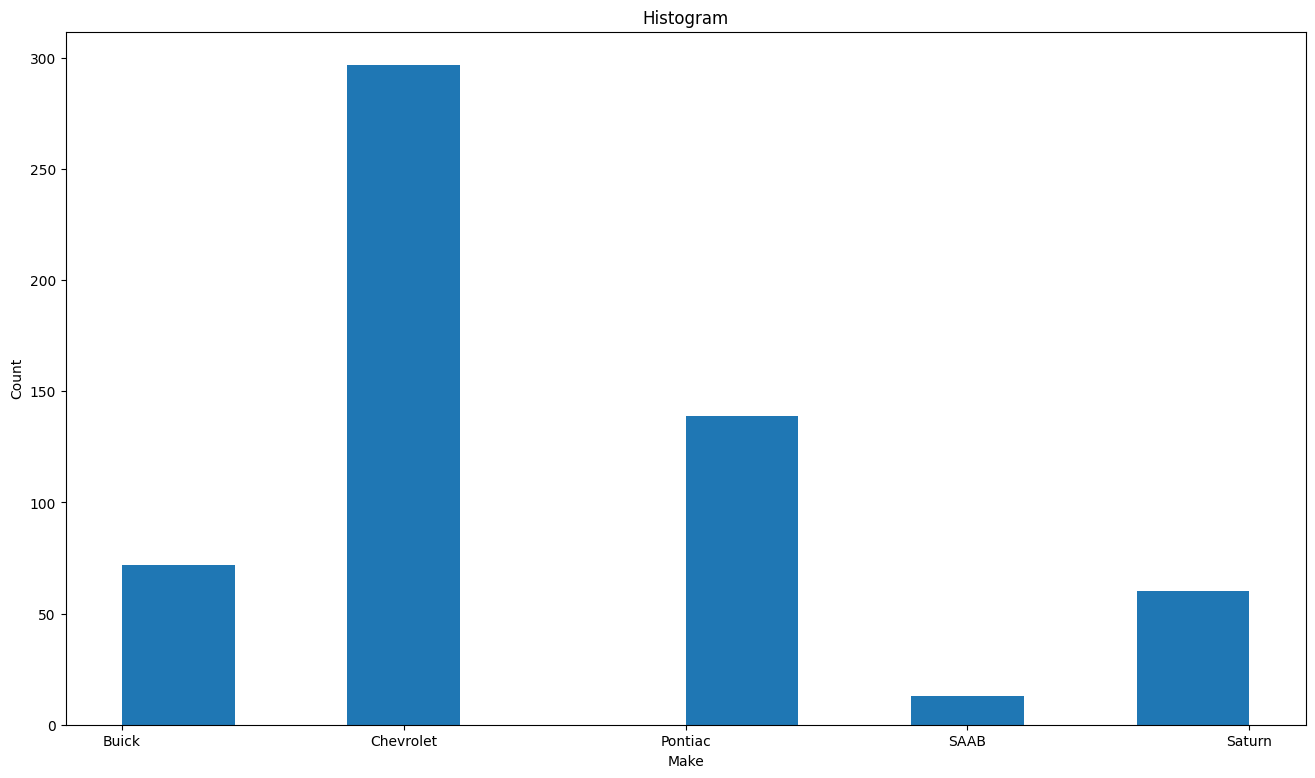

In [ ]:
fig = plt.figure() # Create a figure
fig.set_size_inches(16, 9) # Set size
plt.title('Histogram') # Title of the plot
plt.ylabel('Count') #yaxis
plt.xlabel('Make') #xaxis
plt.hist(data_cheap_cars.Make) #Histogram
plt.show() # Show

### We see that we 5 categories, it is okey and we can use One-hot encoding


In [ ]:
data_cheap_cars = pd.get_dummies(data_cheap_cars, columns = ['Make'], drop_first = True) #We will have new binary columns which each category
data_cheap_cars = data_cheap_cars.replace({False: 0, True: 1}) #Replace 0 on False and 1 on True

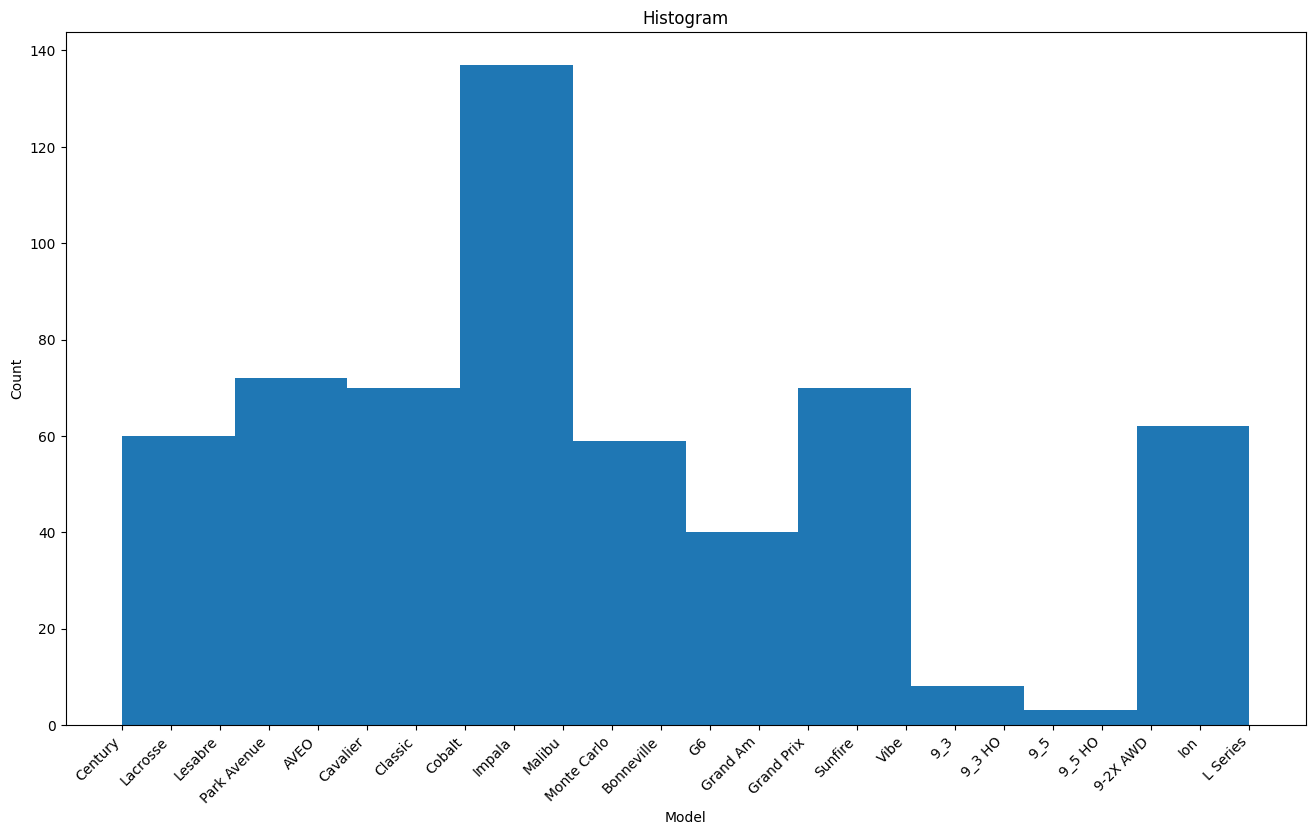

In [ ]:
fig = plt.figure() # Create a figure
fig.set_size_inches(16, 9) # Set size
plt.title('Histogram') #Title of the plot
plt.ylabel('Count') # yaxis
plt.xlabel('Model') # xaxis
plt.xticks(rotation=45, ha='right') # we have a lot of categories so it's better to rotate names
plt.hist(data_cheap_cars.Model) # Create a hist
plt.show() # Show a figure

### We have a lot of categories in Model, let's use LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder # Import

label_encoder = LabelEncoder() # Create labelencoder

data_cheap_cars['Model_encoded'] = label_encoder.fit_transform(data_cheap_cars['Model']) #It will encode column: Model, it is like frequency encoding
data_cheap_cars = data_cheap_cars.drop('Model', axis = 1) # Delete this column because we have an encoded column

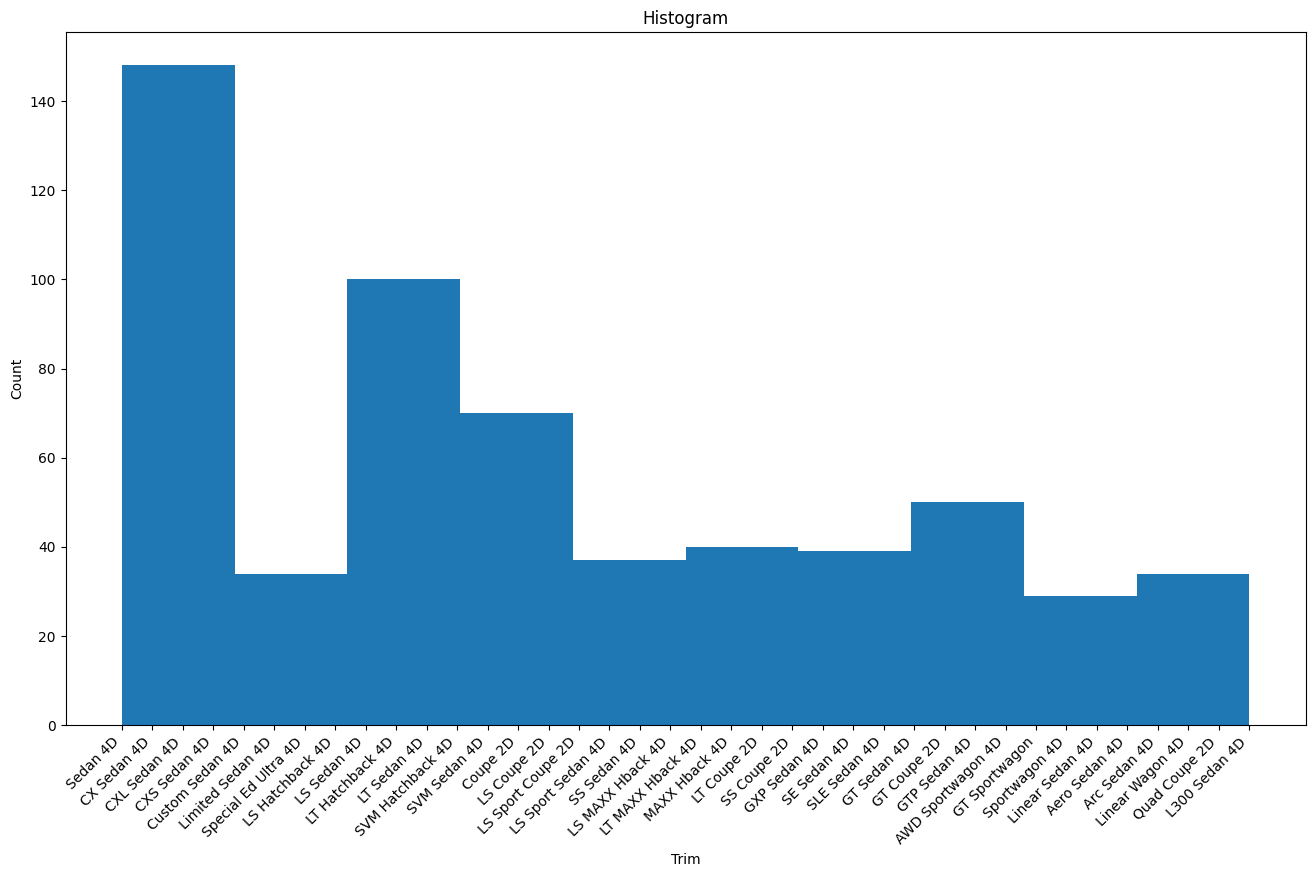

In [ ]:
fig = plt.figure() # Create a figure
fig.set_size_inches(16, 9) # Set size
plt.title('Histogram') # Name of a figure
plt.ylabel('Count') # yaxis
plt.xlabel('Trim') # xaxis
plt.xticks(rotation=45, ha='right') # rotate names because we have a lot of category
plt.hist(data_cheap_cars.Trim) # Create a hist
plt.show() # Show the figure

### We have a lot of categories in Model, let's use LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

data_cheap_cars['Trim_encoded'] = label_encoder.fit_transform(data_cheap_cars['Trim'])
data_cheap_cars = data_cheap_cars.drop('Trim', axis = 1)

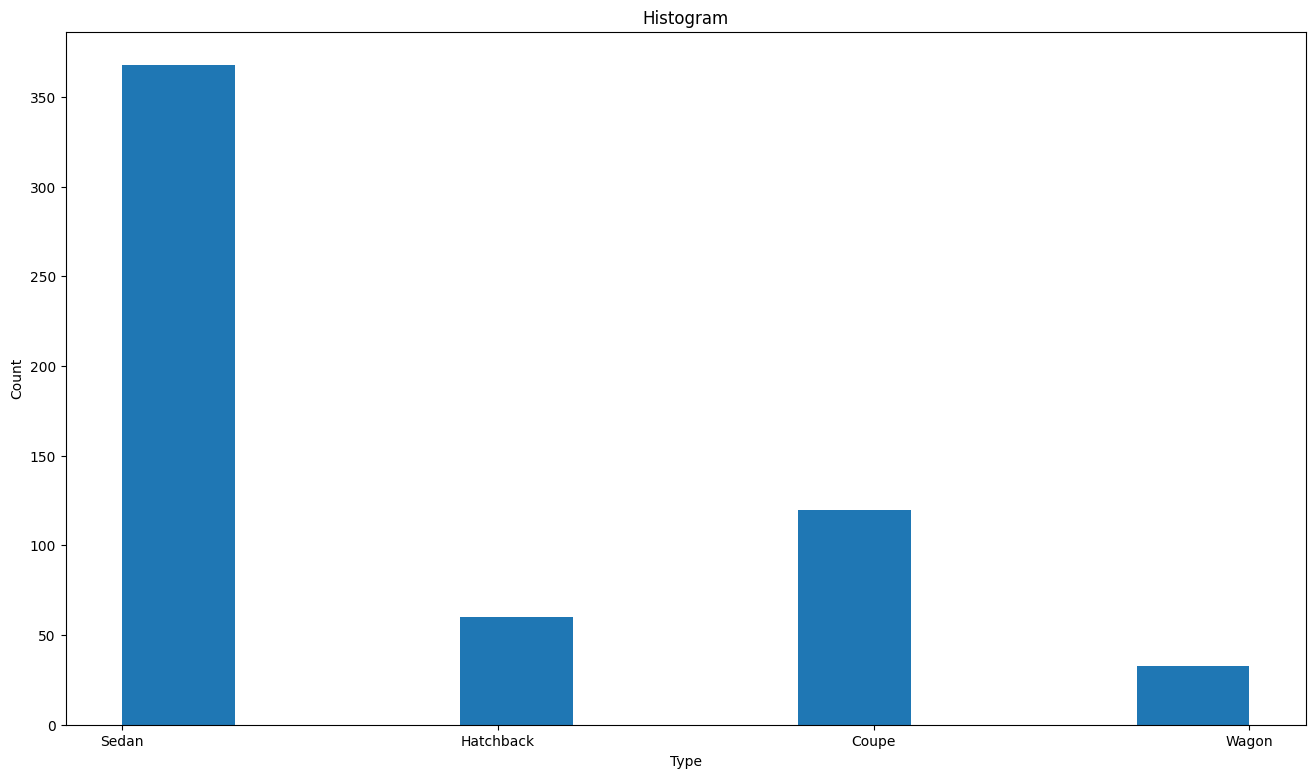

In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 9)
plt.title('Histogram')
plt.ylabel('Count')
plt.xlabel('Type')
plt.hist(data_cheap_cars.Type)
plt.show()

### We see that we 4 categories, it is okey and we can use One-hot encoding

In [ ]:
data_cheap_cars = pd.get_dummies(data_cheap_cars, columns = ['Type'], drop_first = True)
data_cheap_cars = data_cheap_cars.replace({False: 0, True: 1})

In [ ]:
data_cheap_cars.head() # see 5 first rows

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage_2,Cylinder_2,...,Doors_2,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_encoded,Trim_encoded,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,67584841,216,...,16,0,0,0,0,8,35,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,83448225,216,...,16,0,0,0,0,8,35,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,174134416,216,...,16,0,0,0,0,8,35,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,267060964,216,...,16,0,0,0,0,8,35,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,393308224,216,...,16,0,0,0,0,8,35,0,1,0


In [ ]:
data_cheap_cars.info() # information about data, right now we don't have object so we can build a model

<class 'pandas.core.frame.DataFrame'>
Index: 581 entries, 0 to 803
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           581 non-null    float64
 1   Mileage         581 non-null    int64  
 2   Cylinder        581 non-null    int64  
 3   Liter           581 non-null    float64
 4   Doors           581 non-null    int64  
 5   Cruise          581 non-null    int64  
 6   Sound           581 non-null    int64  
 7   Leather         581 non-null    int64  
 8   Mileage_2       581 non-null    int64  
 9   Cylinder_2      581 non-null    int64  
 10  Liter_2         581 non-null    float64
 11  Doors_2         581 non-null    int64  
 12  Make_Chevrolet  581 non-null    int64  
 13  Make_Pontiac    581 non-null    int64  
 14  Make_SAAB       581 non-null    int64  
 15  Make_Saturn     581 non-null    int64  
 16  Model_encoded   581 non-null    int64  
 17  Trim_encoded    581 non-null    int64  


In [ ]:
y = data_cheap_cars.Price # Out target
x = data_cheap_cars.drop('Price', axis = 1) #our Variables

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

lin_model_6 = LinearRegression(fit_intercept = True) # LinearRegression
lin_model_6.fit(X_train, y_train) # Let's train our data

print(lin_model_6.coef_) # Weights of the model
print(lin_model_6.intercept_) # Intercept of the model

[-1.10139956e-01 -5.66606536e+02  3.47383464e+03  1.80697627e+01
  3.08215111e+02  8.61677144e+01  3.82506889e+02 -2.53860627e-07
 -6.05576912e+00  1.34069606e+01  1.08418576e+02 -1.89351761e+03
 -1.84864965e+03  1.04035086e+04 -1.16058371e+03  2.53723290e+00
 -7.34600561e+00 -1.50176657e+03 -1.31990097e+03  2.83070242e+03]
11268.381362279353


In [ ]:
print('RMSE of train data is', np.sqrt(((y_train-lin_model_6.predict(X_train)) ** 2).mean())) # Root Mean Square Error
print('RMSE of test data is', np.sqrt(((y_test-lin_model_6.predict(X_test)) ** 2).mean())) # Root Mean Square Error

RMSE of train data is 1345.4694741311903
RMSE of test data is 1504.2326943698852


In [ ]:
from sklearn.metrics import r2_score

print('R2_score for train data', r2_score(y_train, lin_model_6.predict(X_train)))
print('R2_score for test data', r2_score(y_test, lin_model_6.predict(X_test)))

R2_score for train data 0.8690478191881257
R2_score for test data 0.8547182883176143


In [ ]:
data_expensive_cars.head() # Let's see first 5r rows

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage_2,Cylinder_2,Liter_2,Doors_2
60,25589.983155,2308,Buick,Park Avenue,Sedan 4D,Sedan,6,3.8,4,1,1,0,5326864,216,208.5136,16
61,25098.629057,10014,Buick,Park Avenue,Sedan 4D,Sedan,6,3.8,4,1,1,0,100280196,216,208.5136,16
70,26831.194037,4695,Buick,Park Avenue,Special Ed Ultra 4D,Sedan,6,3.8,4,1,1,0,22043025,216,208.5136,16
71,26060.335350,9795,Buick,Park Avenue,Special Ed Ultra 4D,Sedan,6,3.8,4,1,1,0,95942025,216,208.5136,16
72,26781.814645,12052,Buick,Park Avenue,Special Ed Ultra 4D,Sedan,6,3.8,4,1,1,0,145250704,216,208.5136,16


In [ ]:
data_expensive_cars.info() # Info

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 60 to 741
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       213 non-null    float64
 1   Mileage     213 non-null    int64  
 2   Make        213 non-null    object 
 3   Model       213 non-null    object 
 4   Trim        213 non-null    object 
 5   Type        213 non-null    object 
 6   Cylinder    213 non-null    int64  
 7   Liter       213 non-null    float64
 8   Doors       213 non-null    int64  
 9   Cruise      213 non-null    int64  
 10  Sound       213 non-null    int64  
 11  Leather     213 non-null    int64  
 12  Mileage_2   213 non-null    int64  
 13  Cylinder_2  213 non-null    int64  
 14  Liter_2     213 non-null    float64
 15  Doors_2     213 non-null    int64  
dtypes: float64(3), int64(9), object(4)
memory usage: 28.3+ KB


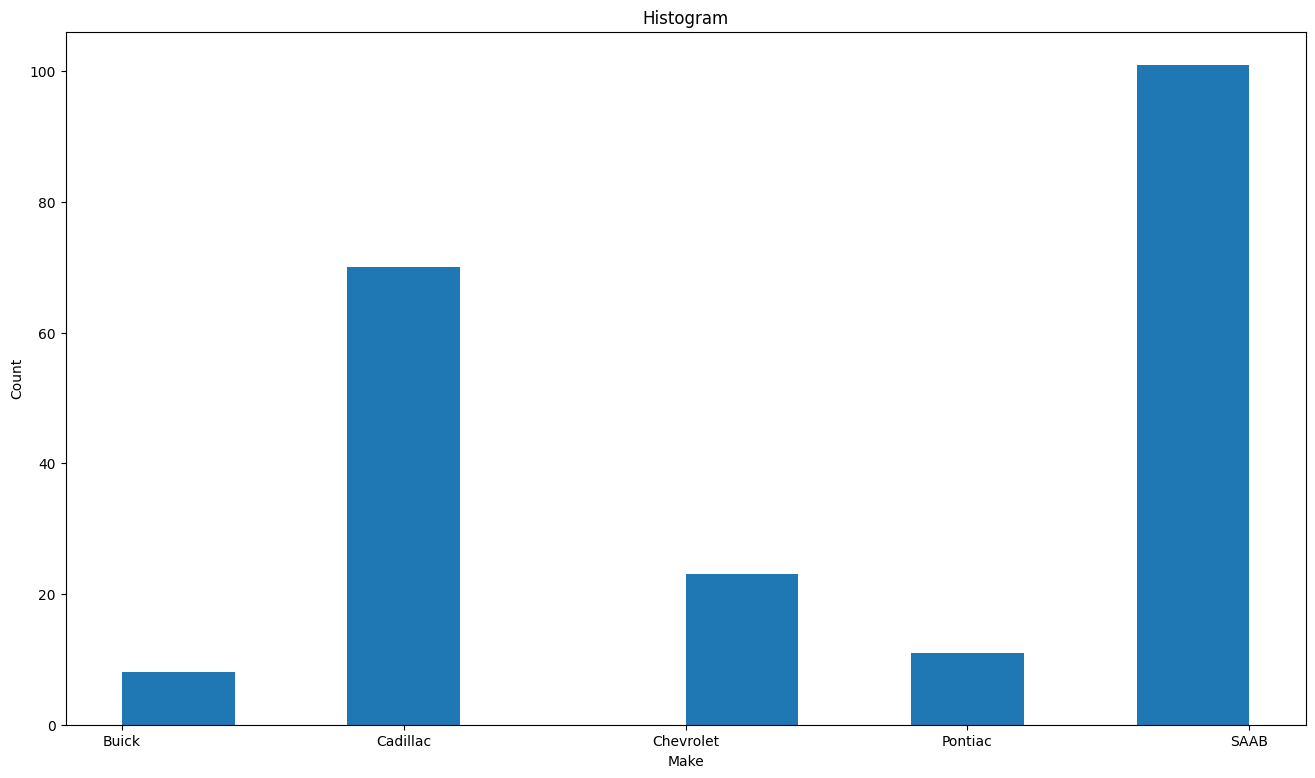

In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 9)
plt.title('Histogram')
plt.ylabel('Count')
plt.xlabel('Make')
plt.hist(data_expensive_cars.Make)
plt.show()

### We see that we 5 categories, it is okey and we can use One-hot encoding


In [ ]:
data_expensive_cars = pd.get_dummies(data_expensive_cars, columns = ['Make'], drop_first = True)
data_expensive_cars = data_expensive_cars.replace({False: 0, True: 1})

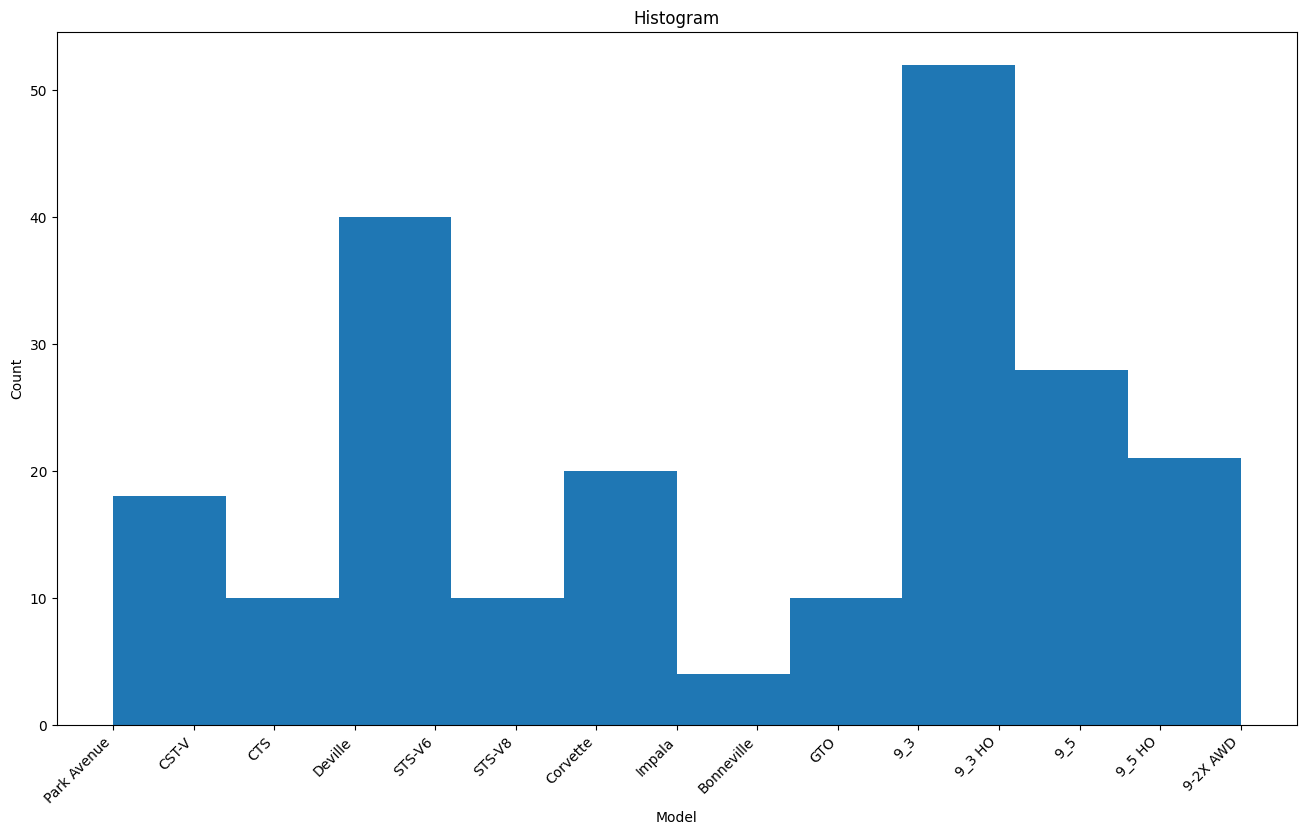

In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 9)
plt.title('Histogram')
plt.ylabel('Count')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.hist(data_expensive_cars.Model)
plt.show()

### We have a lot of categories in Model, let's use LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

data_expensive_cars['Model_encoded'] = label_encoder.fit_transform(data_expensive_cars['Model'])
data_expensive_cars = data_expensive_cars.drop('Model', axis = 1)

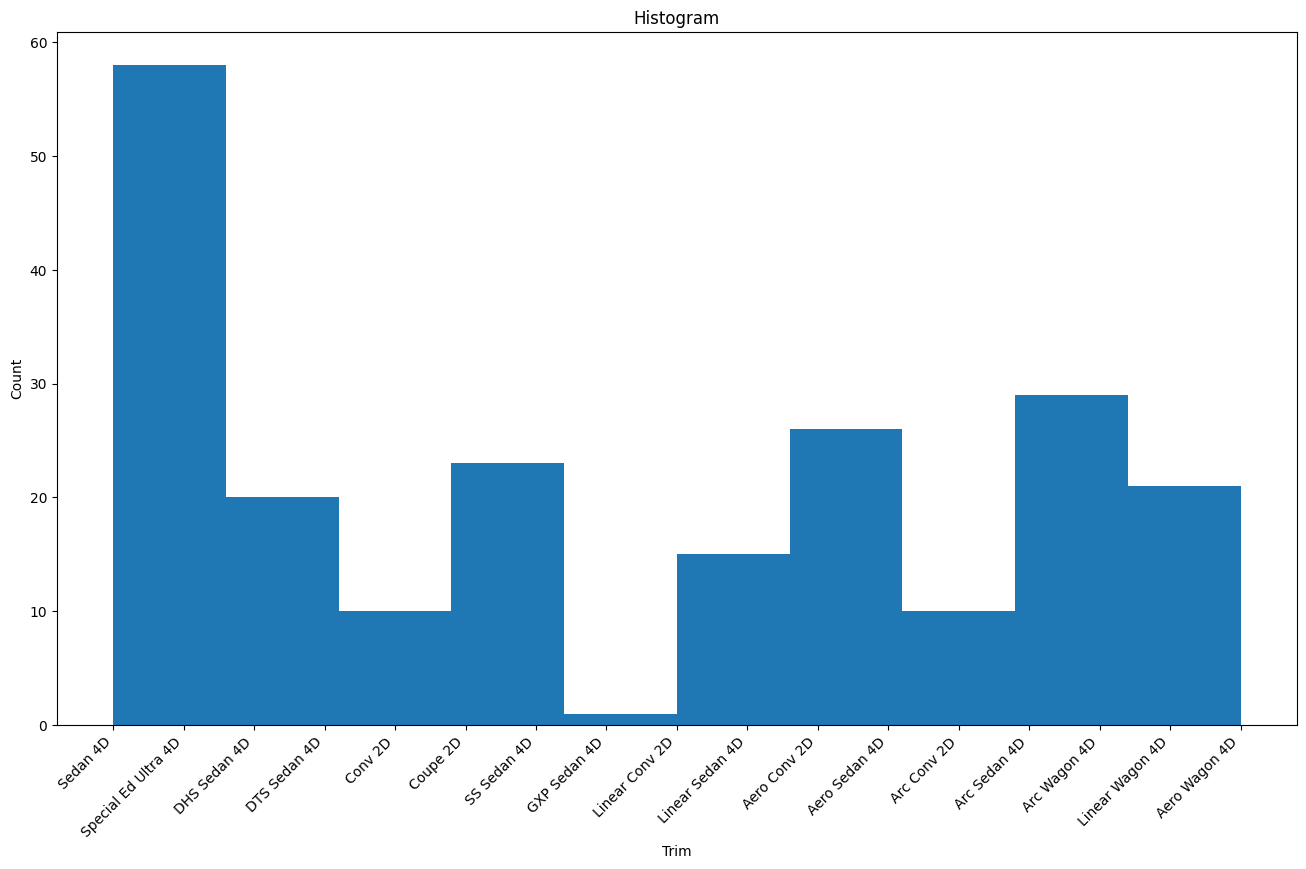

In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 9)
plt.title('Histogram')
plt.ylabel('Count')
plt.xlabel('Trim')
plt.xticks(rotation=45, ha='right')
plt.hist(data_expensive_cars.Trim)
plt.show()

### We have a lot of categories in Trim, let's use One-Hot


In [ ]:
label_encoder = LabelEncoder()

data_expensive_cars['Trim_encoded'] = label_encoder.fit_transform(data_expensive_cars['Trim'])
data_expensive_cars = data_expensive_cars.drop('Trim', axis = 1)

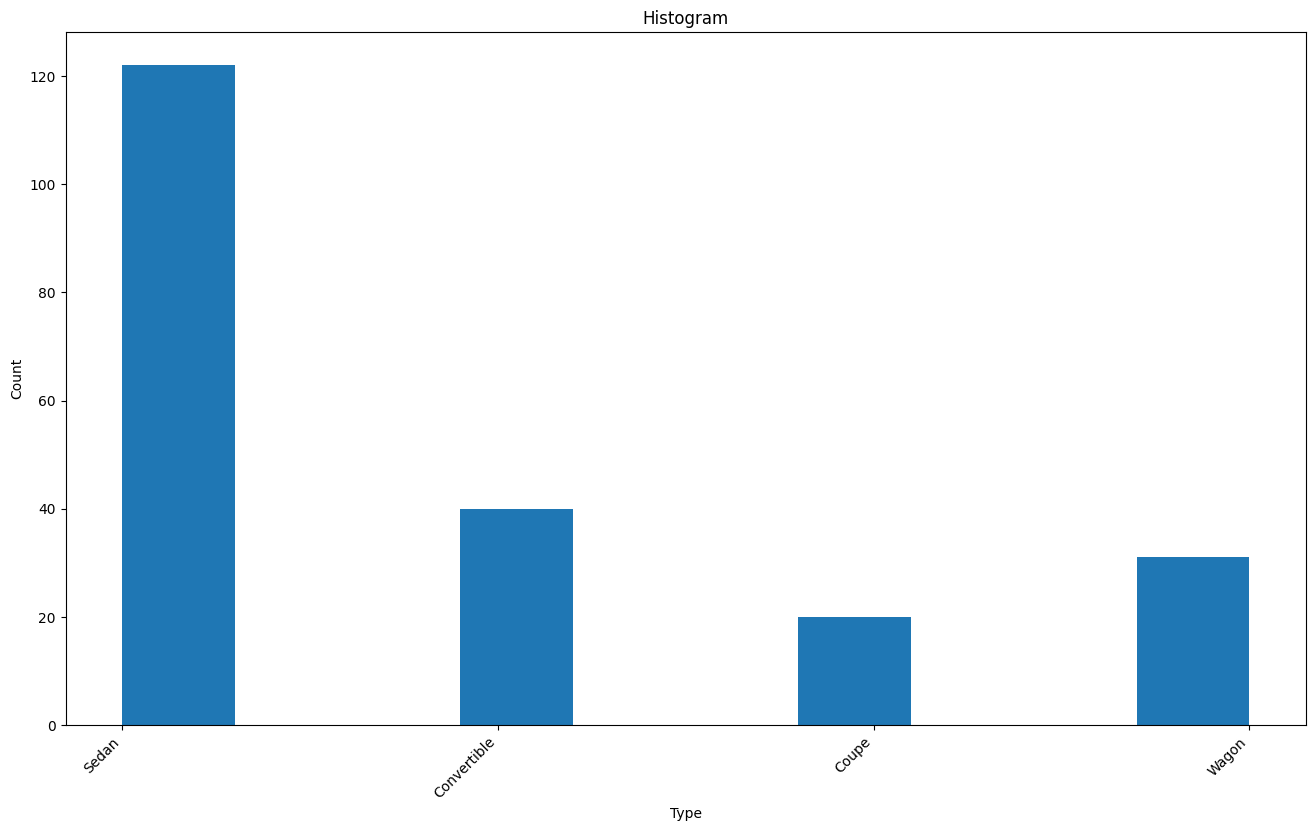

In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 9)
plt.title('Histogram')
plt.ylabel('Count')
plt.xlabel('Type')
plt.xticks(rotation=45, ha='right')
plt.hist(data_expensive_cars.Type)
plt.show()

### We see only 4 categories, let's use one-hot encoding

In [ ]:
data_expensive_cars = pd.get_dummies(data_expensive_cars, columns = ['Type'], drop_first = True)
data_expensive_cars = data_expensive_cars.replace({False: 0, True: 1})

In [ ]:
data_expensive_cars.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage_2,Cylinder_2,...,Doors_2,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Model_encoded,Trim_encoded,Type_Coupe,Type_Sedan,Type_Wagon
60,25589.983155,2308,6,3.8,4,1,1,0,5326864,216,...,16,0,0,0,0,12,15,0,1,0
61,25098.629057,10014,6,3.8,4,1,1,0,100280196,216,...,16,0,0,0,0,12,15,0,1,0
70,26831.194037,4695,6,3.8,4,1,1,0,22043025,216,...,16,0,0,0,0,12,16,0,1,0
71,26060.335350,9795,6,3.8,4,1,1,0,95942025,216,...,16,0,0,0,0,12,16,0,1,0
72,26781.814645,12052,6,3.8,4,1,1,0,145250704,216,...,16,0,0,0,0,12,16,0,1,0


In [ ]:
data_expensive_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 60 to 741
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           213 non-null    float64
 1   Mileage         213 non-null    int64  
 2   Cylinder        213 non-null    int64  
 3   Liter           213 non-null    float64
 4   Doors           213 non-null    int64  
 5   Cruise          213 non-null    int64  
 6   Sound           213 non-null    int64  
 7   Leather         213 non-null    int64  
 8   Mileage_2       213 non-null    int64  
 9   Cylinder_2      213 non-null    int64  
 10  Liter_2         213 non-null    float64
 11  Doors_2         213 non-null    int64  
 12  Make_Cadillac   213 non-null    int64  
 13  Make_Chevrolet  213 non-null    int64  
 14  Make_Pontiac    213 non-null    int64  
 15  Make_SAAB       213 non-null    int64  
 16  Model_encoded   213 non-null    int64  
 17  Trim_encoded    213 non-null    int64  

In [ ]:
y = data_expensive_cars.Price # Out target
x = data_expensive_cars.drop('Price', axis = 1) #our Variables

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

lin_model_7 = LinearRegression(fit_intercept = True) # LinearRegression
lin_model_7.fit(X_train, y_train) # Let's train our data

print(lin_model_7.coef_) # Weights of the model
print(lin_model_7.intercept_) # Intercept of the model

[-3.06809607e-01 -7.98657430e+03  2.39525538e+02 -8.15497093e+01
 -5.11590770e-12  1.32422176e+02  2.26515413e+02  1.17232880e-06
  4.61792121e+01  1.71282668e+01 -4.89298256e+02  1.35863336e+04
 -1.39358838e+03 -6.37150090e+03  8.20874429e+03  1.00781136e+03
 -1.97906518e+01 -5.41572165e+03 -5.57411132e+02  5.16636278e+02]
59452.88314924466


In [ ]:
print('RMSE for train data:', np.sqrt(((y_train-lin_model_7.predict(X_train)) ** 2).mean())) # Root Mean Square Error
print('RMSE for test data:', np.sqrt(((y_test-lin_model_7.predict(X_test)) ** 2).mean())) # Root Mean Square Error

RMSE for train data: 1602.0915780441571
RMSE for test data: 2034.6787939934097


In [ ]:
print('R2_score for train data:', r2_score(y_train, lin_model_7.predict(X_train)))
print('R2_score for test data:', r2_score(y_test, lin_model_7.predict(X_test)))

R2_score for train data: 0.9177014797277926
R2_score for test data: 0.9021994490801236


In [ ]:
data_expensive_cars.Price.min()

25097.4732491841

## We used to work with different techniques and finally we reduced RMSE, also r2_score is close to 1, I think we did a good job.